In [34]:
# model_names = ['xception','densenet201','resnetv2_50', 'vgg16', 'darknet53', 'mobilenetv3_large_100', 'inception_resnet_v2', 'nasnetalarge', 'efficientnetv2_rw_m', 'convnext_xlarge_384_in22ft1k']
model_names = [
"efficientnetv2_rw_m",
"mobilenetv3_large_100",
"inception_resnet_v2",
"resnetv2_50",
"nasnetalarge",
"darknet53",
"xception",
"densenet201",
"vgg16",
"convnext_xlarge_384_in22ft1k",
]

model_name_dict = {
"efficientnetv2_rw_m": "EfficientNetV2",
"mobilenetv3_large_100": "MobileNetV3",
"inception_resnet_v2": "Inception ResNet V2",
"resnetv2_50": "ResNetV2 50",
"nasnetalarge": "NasNetLarge",
"darknet53": "Darknet53",
"xception": "Xception",
"densenet201": "DenseNet201",
"vgg16": "VGG16",
"convnext_xlarge_384_in22ft1k": "ConvNext",
}

dataset_folder = "dataset03"
exp_name = f"{dataset_folder}_benchmarking"

In [35]:
import os
import pandas as pd

benchmark_dict = {}

for model_name in model_names:
    print(model_name)
    
    if os.path.exists(f"models/{exp_name}/{model_name}_eval.csv"):
        benchmark_dict[model_name] = pd.read_csv(f"models/{exp_name}/{model_name}_eval.csv")
        continue

efficientnetv2_rw_m
mobilenetv3_large_100
inception_resnet_v2
resnetv2_50
nasnetalarge
darknet53
xception
densenet201
vgg16
convnext_xlarge_384_in22ft1k


In [57]:
result_df = None
for model_name in model_names:
    benchmark_dict[model_name]["name"] = [model_name_dict[model_name] for i in range(len(benchmark_dict[model_name]))]
    if result_df is None:
        result_df = benchmark_dict[model_name]
    else:
        result_df = pd.concat([result_df, benchmark_dict[model_name]], ignore_index=True)
result_df["index"] = list(range(len(result_df)))
len(result_df)

20000

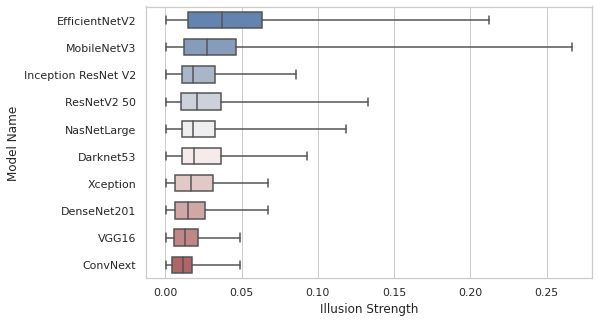

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 5))
sns.set_theme(style="whitegrid")
# sns.kdeplot(data=benchmark_dict[model_name], x='value', hue='type', bw_adjust = 0.5)
sns.boxplot(data=result_df[result_df['type'] == 'FN'], x='value', y='name', whis=[0, 100], width=.6, palette="vlag")
# sns.lmplot(data=result_df[result_df['type'] == 'FN'], x='value', y='index', palette="vlag")
# Add in points to show each observation
# sns.stripplot(data=result_df[result_df['type'] == 'FN'], x='value', y='type', hue='name', size=4, marker="x", linewidth=1, alpha=.1)
# plt.legend(['False Negative', 'True Negative'])
plt.xlabel ("Illusion Strength");
plt.ylabel ("Model Name");
# plt.ylabel ("");
# plt.title (f"False Negative Distribution");
# plt.show()
# sns.despine(trim=True, left=True)

plt.savefig("result.pdf", format="pdf", bbox_inches='tight', pad_inches= 0.0)